# Entrega situación problema

We need `seaborn`, which shall be included it in `requirements.txt` file

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [2]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install xlrd

Note: you may need to restart the kernel to use updated packages.


In [5]:
%ls datasets/

 adult.csv                                 cwurData.csv
 airline_data.csv                          data.csv
 antropometria00.csv                       headbrain.csv
 antropometria-dataset.csv                 mic.xlsx
 antropometria-dataset.xlsx                movies.csv
 BD.xlsx                                   nhanes_2015_2016.csv
 Canada.xlsx                               pokemon.csv
 Cartwheeldata.csv                         sample_pivot.csv
 census.csv                                Tabla.xlsx
'Clase graficas de pastel (1) (1).ipynb'   tips.csv
'Clase graficas de pastel (2).ipynb'       weight-height.csv


# 1. Traemos de excel el documento, y seleccionamos la variable a calcular

In [6]:
df=pd.read_excel('datasets/BD.xlsx',
               sheet_name='Sheet1',
               engine='openpyxl'
              )
df

,Unnamed: 0,Temperatura,Voltaje,Ángulo,Velocidad,% carbón,Robot,Diámetro promedio
0,1,97.1,16.7,38.9,5,10,1,195.415
1,2,108.0,29.5,68.7,10,21,1,71.995
2,3,92.3,27.0,62.9,7,13,1,102.980
3,4,131.7,22.2,51.7,6,30,1,186.680
4,5,81.2,15.8,36.8,9,15,1,127.680
...,...,...,...,...,...,...,...,...
63,64,89.7,28.2,65.7,10,21,3,58.440
64,65,88.6,25.8,60.1,6,25,3,120.460
65,66,154.4,13.0,30.3,10,10,3,208.790
66,67,121.7,24.4,56.9,7,30,3,152.900


## Conclusion
#### Al llamar la base de datos, seleccioné la columna de Diámetro promedio, ya que esta base de datos es por parte de una empresa encargada de hacer tornillos, en los que deben cuidar los estándares y medidas de sus tornillos

In [7]:
df.columns

Index(['Unnamed: 0', 'Temperatura', 'Voltaje', 'Ángulo', 'Velocidad',
       '% carbón', 'Robot', 'Diámetro promedio'],
      dtype='object')

In [8]:
df.set_index('Unnamed: 0', inplace=True)
df.head()

,Temperatura,Voltaje,Ángulo,Velocidad,% carbón,Robot,Diámetro promedio
Unnamed: 0,,,,,,,
1,97.1,16.7,38.9,5,10,1,195.415
2,108.0,29.5,68.7,10,21,1,71.995
3,92.3,27.0,62.9,7,13,1,102.980
4,131.7,22.2,51.7,6,30,1,186.680
5,81.2,15.8,36.8,9,15,1,127.680


# 2. Hacemos gráficas de variables contra Diámetro promedio, para identificar si existe relación

Text(0.5, 1.0, 'Scatter plot of Voltaje vs Diametro promedio')

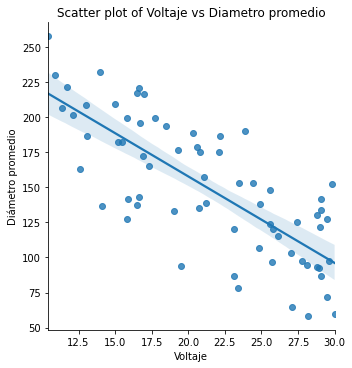

In [9]:

sns.lmplot(x='Voltaje',
           y='Diámetro promedio',
           data=df,
           fit_reg=True,
          )
plt.title('Scatter plot of Voltaje vs Diametro promedio')


Text(0.5, 1.0, 'Scatter plot of Ángulo vs Diametro promedio')

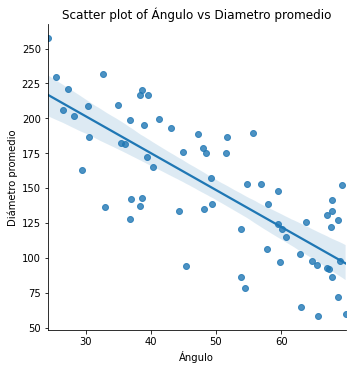

In [10]:
sns.lmplot(x='Ángulo',
           y='Diámetro promedio',
           data=df,
           fit_reg=True,
          )
plt.title('Scatter plot of Ángulo vs Diametro promedio')

Text(0.5, 1.0, 'Scatter plot of Voltaje vs Ángulo')

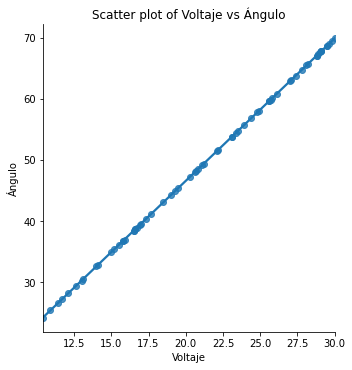

In [11]:
sns.lmplot(x='Voltaje',
           y='Ángulo',
           data=df,
           fit_reg=True,
          )
plt.title('Scatter plot of Voltaje vs Ángulo')

## Conclusión
#### Después de hacer el análisis y revisar las primeras 2 gráficas, vimos que la variable de voltaje y ángulo si afectan al resultado final, pues podemos observar una correlación negativa, sin embargo, también nos pudimos dar cuenta que estas variables mostraban exactamente el mismo comportamiento contra el resultado final, por lo que al hacer un análisis para ambas, nos pudimos dar cuenta que representan exactamente lo mismo, por lo que podríamos eliminar una de ellas automáticamente al hacer un análisis de regresión, pues nos arrojan el mismo resultado

# 3. Qué type son las variables a analizar?

In [12]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68 entries, 1 to 68
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Temperatura        68 non-null     float64
 1   Voltaje            68 non-null     float64
 2   Ángulo             68 non-null     float64
 3   Velocidad          68 non-null     int64  
 4   % carbón           68 non-null     int64  
 5   Robot              68 non-null     int64  
 6   Diámetro promedio  68 non-null     float64
dtypes: float64(4), int64(3)
memory usage: 4.2 KB


## Conclusión
#### Podemos observar que las variables de temperatura, voltaje, y ángulo son de tipo float, pues tienen números decimales, a su vez, la variable de Diámetro promedio que es la que estimaremos, es de tipo float también. Las variables de velocidad, % de carbón y Robot son números enteros, por lo que su type es int, sin embargo, la variable de robot es categórica, pues nos habla sobre el tipo de robot o maquinaria utilizada para poder realizar los tornillos, por lo que existen solo robot 1, 2 y 3

# 4. Descripción de las variables a utilizar

In [13]:
df.describe()

,Temperatura,Voltaje,Ángulo,Velocidad,% carbón,Robot,Diámetro promedio
count,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000
mean,97.057353,21.327941,49.691176,6.294118,17.970588,1.823529,149.498603
std,16.253682,5.961114,13.885209,2.331221,7.066783,0.827533,47.761947
min,55.200000,10.400000,24.200000,1.000000,10.000000,1.000000,58.440000
25%,87.775000,16.500000,38.400000,5.000000,13.000000,1.000000,119.131250
50%,95.500000,21.150000,49.300000,6.000000,15.000000,2.000000,142.562500
75%,103.400000,27.025000,62.950000,8.000000,21.000000,3.000000,187.206250
max,154.400000,30.000000,69.900000,12.000000,30.000000,3.000000,257.370000


## Conclusión
#### Podemos observar que existen 68 observaciones, pues nos lo muestra en el conteo para cada una de las variables, así como observamos datos como media, desviación estándar,  mínimo, máximo, etc...

# 5. Realizar boxplots para identificar datos atípicos

Text(0.5, 1.0, 'Boxplot')

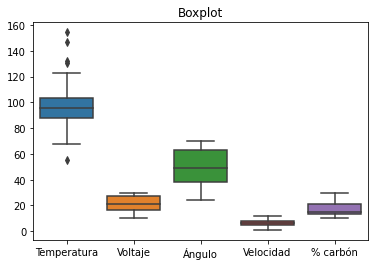

In [14]:
sns.boxplot(data=df.loc[:,['Temperatura', 'Voltaje', 'Ángulo', 'Velocidad',
       '% carbón']]),
                        
plt.title('Boxplot')

## Conclusión
#### Podemos observar que la variable de temperatura cuenta con aproximadamente 4 datos atípicos, los cuales se tendrían que observar y analizar especificamente para decidir si eliminarlos o si en realidad no son atípicos y podemos dejarlos en los cálculos. No se incluyó la variable de robot, pues al ser categórica, no puede tener datos atípicos.

In [15]:
lista2= df.loc[:,['Temperatura', 'Voltaje', 'Ángulo', 'Velocidad','% carbón','Robot']]


In [16]:
lista=['Temperatura', 'Voltaje', 'Ángulo', 'Velocidad','% carbón','Robot']


# 6. Identificar la correlación entre cada una de las variables

In [22]:
df[lista].corr()

,Temperatura,Voltaje,Ángulo,Velocidad,% carbón,Robot
Temperatura,1.000000,-0.162641,-0.162794,0.248732,-0.103523,-0.130730
Voltaje,-0.162641,1.000000,0.999998,0.089296,0.223621,0.113264
Ángulo,-0.162794,0.999998,1.000000,0.089119,0.223961,0.113649
Velocidad,0.248732,0.089296,0.089119,1.000000,0.024088,0.050516
% carbón,-0.103523,0.223621,0.223961,0.024088,1.000000,0.121606
Robot,-0.130730,0.113264,0.113649,0.050516,0.121606,1.000000


## Conclusión
#### En la tabla anterior se muestra la correlación entre cada una de las variables, y observándola, nos podemos dar cuenta de lo mencionado anteriormente, la variable de ángulo tiene una correlación de 1 aproximadamente con la variable de voltaje, por lo que nos podemos dar cuenta que tienen practicamente el mismo comportamiento. 

In [18]:
x=lista2
y= df['Diámetro promedio']

# 7. Realizamos un modelo de regresión múltiple utilizando todas las variables

In [19]:

model=sm.OLS.from_formula('y ~ x',
                         data=df)
result=model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     3953.
Date:                Tue, 19 Oct 2021   Prob (F-statistic):           4.87e-77
Time:                        04:30:15   Log-Likelihood:                -156.06
No. Observations:                  68   AIC:                             326.1
Df Residuals:                      61   BIC:                             341.7
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    235.9134      2.571     91.746      0.000     230.772     241.055
x[0]           1.1015      0.020     54.360      0.000       1.061       1.142
x[1]         -14.3562     26.897     -0.534      0.595     -68.140      39.428
x[2]           3.9315     11.548      0.340      0.735     -19.161      27.024
x[3]         -12.9060      0.139    -92.557      0.000     -13.185     -12.627
x[4]          -0.0844      0.046     -1.840      0.071      -0.176       0.007
x[5]           0.1390      0.388      0.358      0.722      -0.637       0.915
==============================================================================
Omnibus:                        6.551   Durbin-Watson:                   1.524
Prob(Omnibus):                  0.038   Jarque-Bera (JB):                2.533
Skew:                          -0.004   Prob(JB):                        0.282
Kurtosis:                       2.055   Cond. No.                     1.08e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.08e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Conclusión
#### Observando el modelo de regresión, podemos observar como tenemos una R al cuadrado de .997, por lo que sabemos que nuestro modelo de regresión es muy bueno, y que podremos estimar el valor del diámetro promedio de manera confiable. A su vez, nos arroja la ecuación de regresión utilizando al intercepto, y el valor que multiplicará a cada una de las variables. También observamos que tenemos el valor de Durbin-Watson de 1.524

# 8. Realizamos una gráfica de regresión con alguna de las variables

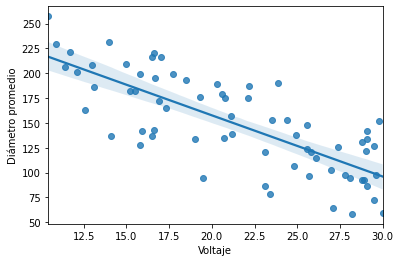

In [20]:
ax=sns.regplot(x= 'Voltaje',
               y='Diámetro promedio',
              data=df)

## Conclusión
#### Al realizar la gráfica de regresión, utilizamos la variable de voltaje contre el diámetro promedio, para saber si ésta variable era significativa con el resultado final, y vimos que tienen una correlación negativa, por lo que en realidad esta variable si afecta al resultado final.